# How to Use The Pre-Trained VGG Model to Classify Objects in Photographs

In this tutorial, we will discover the VGG convolutional neural network models for image classification.

After completing this tutorial, we will know:

* How to load the VGG model in Keras and summarize its structure.
* How to use the loaded VGG model to classifying objects in ad hoc photographs.

## Table of Contents

- [1 - Packages](#1)
- [2 - Load the VGG Model in Keras](#2)
- [3 - Develop a Simple Photo Classifier](#3)
  - [3.1 - Get a Sample Image](#3-1)
  - [3.2 - Load the VGG Model](#3-2)
  - [3.3 - Load and Prepare Image](#3-3)
  - [3.4 - Make a Prediction](#3-4)
  - [3.5 - Interpret Prediction](#3-5)
- [4 - Summary](#4)



<a name='1'></a>
## 1 - Packages

Run the following code cell to import the necessary packages and dependencies you will need to perform VGG Network.

In [3]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

<a name='2'></a>
## 2 - Load the VGG Model in Keras

The model can be created as follows:

In [73]:
model = VGG19()

The first time we run this example, Keras will download the weight files from the Internet and store them in the ~/.keras/models directory.

In [74]:
!ls -lh ~/.keras/models


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
total 549M
-rw-r--r-- 1 root root  35K Aug 31 08:04 imagenet_class_index.json
-rw-r--r-- 1 root root 549M Aug 31 06:56 vgg19_weights_tf_dim_ordering_tf_kernels.h5


So, the weights are about 549Mb and they were downloaded once. The next time we run the above code, the weights would be loaded locally and the model should be ready to use in seconds.

We can use the standard Keras tools for inspecting the model structure.

In [75]:
print(model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

<a name='3'></a>
## 3 - Develop a Simple Photo Classifier

<a name='3-1'></a>
### 3.1 - Get a Sample Image

First of all, we need to mount google drive in order to access the images directory.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


Then, access to images directory.

In [4]:
%cd drive/MyDrive/Colab\ Notebooks/CNN/vgg/coffee_cup_images
!ls

/content/drive/MyDrive/Colab Notebooks/CNN/vgg/coffee_cup_images
coffee_cup_1.jpeg  coffee_cup_2.jpeg


Now, load an image in the images directory

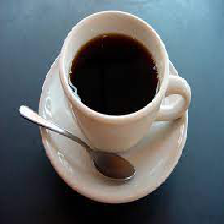

In [5]:
# load an image from file
image = load_img('coffee_cup_1.jpeg', target_size=(224, 224))
image

That 's it. It is a coffee cup. :)

<a name='3-2'></a>
### 3.2 - Load the VGG Model

In [7]:
# load the model
model = VGG19()

<a name='3-3'></a>
### 3.3 - Load and Prepare Image

First, we can use the load_img() function to load the image and resize it to the required size of 224×224 pixels.

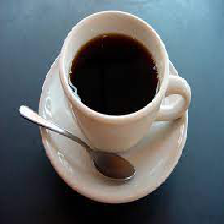

In [8]:
image = load_img('coffee_cup_1.jpeg', target_size=(224, 224))
image

Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [9]:
# convert the image pixels to a numpy array
image = img_to_array(image)

In [10]:
image.shape

(224, 224, 3)

The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.

In [11]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Specifically, from the paper:

"The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."

[— Very Deep Convolutional Networks for Large-Scale Image Recognition, 2014](https://arxiv.org/abs/1409.1556)

Keras provides a function called preprocess_input() to prepare new input for the network.

In [12]:
image = preprocess_input(image)

<a name='3-4'></a>
### 3.4 - Make a Prediction

We can call the predict() function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [13]:
yhat = model.predict(image)

<a name='3-5'></a>
### 3.5 - Interpret Prediction

In [14]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
espresso (70.26%)


So, the VGG model predicted the object in the image is espresso with the confidence probability of 70.26%.

<a name='4'></a>
## 4 - Summary

In this tutorial, we discovered the VGG convolutional neural network models for image classification.

Specifically, we learned:

How to load the VGG model in Keras and summarize its structure.
How to use the loaded VGG model to classifying objects in ad hoc photographs.